In [393]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from tqdm.notebook import tqdm

In [394]:
def oversampler_choice_train(x):
    global X_train, y_train
    if x=="ros":
        ros = RandomOverSampler()
        X_train, y_train = ros.fit_sample(X_train, y_train)
        print("Random Oversampler: ", y_train.value_counts())
    elif x=="smote":
        smote = SMOTE()
        X_train, y_train = smote.fit_sample(X_train, y_train)
        print("SMOTE: ", y_train.value_counts())
    elif x == "ada":
        ada = ADASYN(random_state=42)
        X_train, y_train = ada.fit_sample(X_train, y_train)
        print("ADASYN: ", y_train.value_counts())
    else:
        print ("Input should be ros, smote or ada")

In [395]:
def model_predictions(x):
    global X_train, X_test, y_train, y_test
    if x == "logistic":
        model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
        model.fit(X_train, y_train)
        print("Logistic:")
        predictions =  model.predict(X_test)
    elif x == "knn":
        model = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
        model.fit(X_train, y_train)
        print("KNN:")
        predictions = model.predict(X_test)
    elif x=="decision_tree":
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        print("Decision Tree:")
        predictions = model.predict(X_test)
    elif x=="random_forest":
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        print ("Random Forest:")
        predictions = model.predict(X_test)
    else:
        print ("Choose logistic, knn, decision_tree or random_forest")   
    
    print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions))
    print("Kappa: ", cohen_kappa_score(y_test, predictions))       
    print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) #should be as high as possible 0-1
    print("Accuracy score: ", accuracy_score(y_test, predictions)) #percent correct 0-1
    print("F1 score: ", f1_score(y_test, predictions)) #should be as high as possible 0-1      
    print ("R squared: ", r2_score(y_test, predictions))
    print ("MSE: ", mean_squared_error(y_test, predictions))
    print ("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))
    print ("MAE: ", mean_absolute_error(y_test, predictions))
    print ("Confusion Matrix - raw:")
    plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")
    plt.show() 
    print ("Confusion Matrix - normalised:")
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "GnBu")
    plt.show() 

In [396]:
data = pd.read_csv('data_preprocessed.csv')

In [397]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.707195,-0.701538,-1.017057,-0.574267,-1.001225,-0.703481,-0.704542,-0.430354,-0.682111,1.500015,-0.434071,-0.175984,0.627343,0.098647,-0.171386,1.351088,-1.355570,No
1,-0.707195,-0.701538,-1.017057,-0.574267,0.998777,-0.703481,1.419363,-0.430354,-0.682111,-0.666660,2.303773,-0.175984,-2.009151,-1.745479,-1.206584,-1.300913,0.737697,No
2,-0.707195,-0.701538,0.983229,-0.574267,-1.001225,-0.703481,1.419363,2.323667,-0.682111,-0.666660,-0.434071,-0.175984,-1.786702,-1.623988,-1.534192,-0.965457,0.737697,No
3,-0.707195,-0.701538,-1.017057,-0.574267,0.998777,-0.703481,-0.704542,-0.430354,-0.682111,1.500015,-0.434071,-0.175984,0.823976,0.142167,0.700991,-0.098335,-1.355570,No
4,-0.707195,-0.701538,-1.017057,-0.574267,0.998777,-0.703481,1.419363,-0.430354,-0.682111,-0.666660,-0.434071,5.682331,0.796750,-0.106256,1.268130,-0.269228,0.737697,No


In [398]:
y = pd.DataFrame(data[data.columns[-1]])
X = data.drop([data.columns[-1]],axis=1)

In [399]:
mapping = {
        'Yes': 1,
        'No': 0,
    }
y = y[data.columns[-1]].replace(mapping)

In [400]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 17, dtype: int64

In [401]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.707195,-0.701538,-1.017057,-0.574267,-1.001225,-0.703481,-0.704542,-0.430354,-0.682111,1.500015,-0.434071,-0.175984,0.627343,0.098647,-0.171386,1.351088,-1.355570
1,-0.707195,-0.701538,-1.017057,-0.574267,0.998777,-0.703481,1.419363,-0.430354,-0.682111,-0.666660,2.303773,-0.175984,-2.009151,-1.745479,-1.206584,-1.300913,0.737697
2,-0.707195,-0.701538,0.983229,-0.574267,-1.001225,-0.703481,1.419363,2.323667,-0.682111,-0.666660,-0.434071,-0.175984,-1.786702,-1.623988,-1.534192,-0.965457,0.737697
3,-0.707195,-0.701538,-1.017057,-0.574267,0.998777,-0.703481,-0.704542,-0.430354,-0.682111,1.500015,-0.434071,-0.175984,0.823976,0.142167,0.700991,-0.098335,-1.355570
4,-0.707195,-0.701538,-1.017057,-0.574267,0.998777,-0.703481,1.419363,-0.430354,-0.682111,-0.666660,-0.434071,5.682331,0.796750,-0.106256,1.268130,-0.269228,0.737697


In [402]:
#split into train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [403]:
print("y_test:\n",y_test.value_counts())
print("y_train:\n", y_train.value_counts())

y_test:
 0    5064
1     329
Name: 17, dtype: int64
y_train:
 0    11889
1      694
Name: 17, dtype: int64


In [404]:
oversampler_choice_train("ada")

ADASYN:  0    11889
1    11883
Name: 17, dtype: int64


Random Forest:
The accuracy of the model on test set is:  0.9058038197663638
Kappa:  0.13347705566583545
ROC-AUC score:  0.563324402060915
Accuracy score:  0.9058038197663638
F1 score:  0.1832797427652733
R squared:  -0.6443889040944597
MSE:  0.0941961802336362
RMSE:  0.3069139622657076
MAE:  0.0941961802336362
Confusion Matrix - raw:


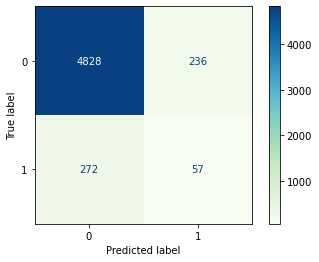

Confusion Matrix - normalised:


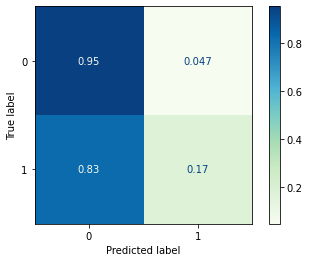

In [405]:
#choose which model to run. Logistic Regression: "logistic", K Nearest Neighbours: "knn", 
#Decision Tree: "decision_tree", Random Forest: "random_forest"

model_predictions("random_forest")

def firth_logit(X,y,num_iter=100,learning_rate=0.01):
    #Initialize weights
    weights = np.ones(X.shape[1])
    print (weights)
    #Define get_predictions function
    def get_predictions(X,weights):
        z = np.dot(X,weights)
        print (z)
        y_pred =  1/(1 + np.exp(-z))
        print (y_pred)
    #Perform gradient descent
    for i in range(num_iter):
        y_pred = get_predictions(X,weights)
        print (y_pred)
        #Calculate Fisher information matrix
        Xt = X.transpose()
        W = np.diag(y_pred*(1-y_pred))
        I = np.linalg.multi_dot([Xt,W,X])
        #Find diagonal of Hat Matrix
        sqrtW = W**0.5
        H = np.linalg.multi_dot([sqrtW,X,np.linalg.inv(I),Xt,sqrtW])
        hat_diag = np.diag(H)
        #Calculate U_star
        U_star = np.matmul((y -y_pred + hat_diag*(0.5 - y_pred)),X)
        #Update weights
        weights += np.matmul(np.linalg.inv(I),U_star)*learning_rate
        #Get final predictions
    y_pred =  get_predictions(X,weights)
    return y_pred

In [406]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
# from sklearn.ensemble import RandomForestClassifier


# X, y = make_blobs(centers=[[0, 0], [1, 1]], random_state=61526, n_samples=50)

# def plot_forest(max_depth=1):
#     plt.figure()
#     ax = plt.gca()
#     h = 0.02

#     x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#     y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#     if max_depth != 0:
#         forest = RandomForestClassifier(n_estimators=20, max_depth=max_depth,
#                                         random_state=1).fit(X, y)
#         Z = forest.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
#         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, alpha=.4)
#         ax.set_title("max_depth = %d" % max_depth)
#     else:
#         ax.set_title("data set")
#     ax.scatter(X[:, 0], X[:, 1], c=np.array(['b', 'r'])[y], s=60)
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
#     ax.set_xticks(())
#     ax.set_yticks(())


# def plot_forest_interactive():
#     from IPython.html.widgets import interactive, IntSlider
#     slider = IntSlider(min=0, max=8, step=1, value=0)
#     return interactive(plot_forest, max_depth=slider)

# plot_forest_interactive()

In [407]:
# import itertools

# list_1=["normalizer", "standard_scaler"]
# list_5=["ordinal encoding", "no ordinal encoding"]
# list_4=["ADASYN", "SMOTE", "ros"]
# list_6=["knn", ""]


# for combination in itertools.product(list_1, list_2, list_3, list_4, list_5):
#     print (combination)

In [408]:
# #Kfold validation
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('RFC', RandomForestClassifier()))


# results = []
# names = []
# scoring = 'accuracy'

# for name, model in models:
#     kfold = KFold(n_splits=10, random_state=7)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)